# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [31]:
# Take make moons in built dataset

data_ = datasets.make_moons(100)

In [15]:
# check the dataset

data_

(array([[-9.49055747e-01,  3.15108218e-01],
        [ 8.20998618e-03,  3.72122838e-01],
        [ 1.40478334e+00, -4.14412623e-01],
        [-9.60230259e-02,  9.95379113e-01],
        [ 1.28681296e-01,  9.28244800e-03],
        [-2.22520934e-01,  9.74927912e-01],
        [ 1.34536505e+00, -4.38468422e-01],
        [-9.91790014e-01,  1.27877162e-01],
        [ 0.00000000e+00,  5.00000000e-01],
        [ 1.96729486e+00,  2.46345416e-01],
        [ 9.60230259e-02,  9.95379113e-01],
        [ 5.72116660e-01,  8.20172255e-01],
        [-4.04783343e-01,  9.14412623e-01],
        [ 7.15472413e-01, -4.58667853e-01],
        [ 6.54634946e-01, -4.38468422e-01],
        [-6.72300890e-01,  7.40277997e-01],
        [-8.01413622e-01,  5.98110530e-01],
        [ 4.27883340e-01, -3.20172255e-01],
        [ 4.81607432e-01, -3.55142763e-01],
        [ 1.71834935e+00, -1.95682551e-01],
        [ 2.38554042e-01, -1.48228395e-01],
        [-4.62538290e-01,  8.86599306e-01],
        [ 1.46253829e+00, -3.865

In [17]:
# create input dataframe

inputData = pd.DataFrame(data = data_[0])

In [ ]:
inputData.head()

,0,1
0,-0.345365,0.938468
1,0.926917,0.375267
2,0.032705,0.246345
3,0.715472,-0.458668
4,-0.032052,0.999486


In [18]:
# create output dataframe

outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,0
1,1
2,1
3,0
4,1


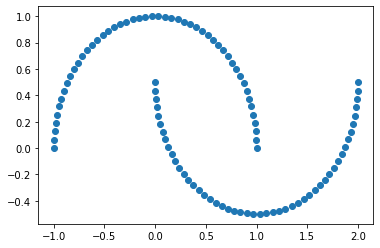

In [19]:
# create a scatter plot for inputData set
plt.scatter(inputData[0], inputData[1])


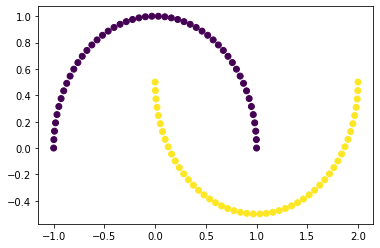

In [20]:
# create a scatter plot for inputData set with outputData color
plt.scatter(inputData[0], inputData[1], c = outputData)


In [22]:
# Call the sklearn Kmeans and make a model with 200 samples
model = KMeans(n_clusters=5)
model.fit(inputData)
#model_fit

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
# check for labels

model.labels_


array([2, 0, 4, 3, 0, 2, 4, 2, 0, 1, 3, 3, 2, 4, 4, 2, 2, 0, 4, 1, 0, 2,
       4, 3, 3, 4, 2, 3, 3, 4, 2, 1, 4, 3, 3, 0, 0, 4, 2, 4, 3, 1, 1, 3,
       4, 0, 0, 1, 4, 1, 0, 1, 4, 2, 1, 3, 3, 4, 3, 3, 2, 1, 0, 0, 0, 0,
       3, 1, 0, 4, 2, 2, 3, 3, 2, 4, 2, 0, 4, 4, 3, 1, 2, 4, 2, 4, 2, 1,
       2, 2, 1, 4, 1, 1, 2, 1, 4, 3, 3, 3], dtype=int32)

In [25]:
# call metrics and check silhoutte score
from sklearn import metrics
metrics.silhouette_score(inputData, model.labels_)


0.4738528152769611

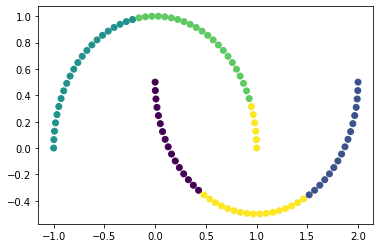

In [26]:
# create a scatter plot for inputData set with model labels color
plt.scatter(inputData[0], inputData[1], c = model.labels_)


#### finding right number of cluster

In [27]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

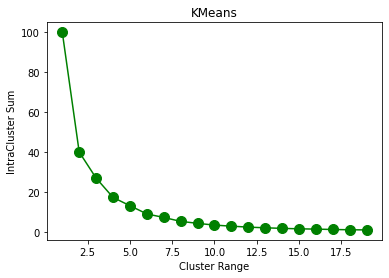

In [28]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()